# Part I - Exploratory Data Analysis: Prosper Loan Dataset
## by Hammed Jimoh

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('prosperLoanData.csv')

loan_data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
#structure of data
loan_data.shape

(113937, 81)

In [4]:
#features in the dataset
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
#extracting features of interest
columns = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
          'ListingCategory (numeric)', 'Occupation', 'IsBorrowerHomeowner', 'EmploymentStatus', 
           'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome',
          'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors']

In [6]:
df_loan = loan_data[columns]

In [7]:
#create a new csv file
df_loan.to_csv('df_loan.csv', index=False)

In [8]:
df_loan.head()

ListingCreationDate  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  2007-08-26 19:09:29.263000000    36  Completed      0.16516        0.1580   
1  2014-02-27 08:28:07.900000000    36    Current      0.12016        0.0920   
2  2007-01-05 15:00:47.090000000    36  Completed      0.28269        0.2750   
3  2012-10-22 11:02:35.010000000    36    Current      0.12528        0.0974   
4  2013-09-14 18:38:39.097000000    36    Current      0.24614        0.2085   

   ListingCategory (numeric)     Occupation  IsBorrowerHomeowner  \
0                          0          Other                 True   
1                          2   Professional                False   
2                          0          Other                False   
3                         16  Skilled Labor                 True   
4                          2      Executive                 True   

  EmploymentStatus  CreditScoreRangeLower  CreditScoreRangeUpper  \
0    Self-employed                  640.0                  659.0   
1         Employed                  680.0                  699.0   
2    Not available                  480.0                  499.0   
3         Employed                  800.0                  819.0   
4         Employed                  680.0                  699.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  Investors  
0          3083.333333                9425              330.43        258  
1          6125.000000               10000              318.93          1  
2          2083.333333                3001              123.32         41  
3          2875.000000               10000              321.45        158  
4          9583.333333               15000              563.97         20

In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   Occupation                 110349 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   EmploymentStatus           111682 non-null  object 
 9   CreditScoreRangeLower      113346 non-null  float64
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  StatedMonthlyIncome        113937 non-null  float64
 12  LoanOriginalAmount         113937 non-null  int64  
 13  MonthlyLoanPayment         11

In [10]:
df_loan.isnull().sum()

ListingCreationDate             0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
Occupation                   3588
IsBorrowerHomeowner             0
EmploymentStatus             2255
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
StatedMonthlyIncome             0
LoanOriginalAmount              0
MonthlyLoanPayment              0
Investors                       0
dtype: int64

In [11]:
df_loan = df_loan.dropna(how='any', axis=0)

In [12]:
df_loan.isnull().sum()

ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
Occupation                   0
IsBorrowerHomeowner          0
EmploymentStatus             0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [13]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110347 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        110347 non-null  object 
 1   Term                       110347 non-null  int64  
 2   LoanStatus                 110347 non-null  object 
 3   BorrowerAPR                110347 non-null  float64
 4   BorrowerRate               110347 non-null  float64
 5   ListingCategory (numeric)  110347 non-null  int64  
 6   Occupation                 110347 non-null  object 
 7   IsBorrowerHomeowner        110347 non-null  bool   
 8   EmploymentStatus           110347 non-null  object 
 9   CreditScoreRangeLower      110347 non-null  float64
 10  CreditScoreRangeUpper      110347 non-null  float64
 11  StatedMonthlyIncome        110347 non-null  float64
 12  LoanOriginalAmount         110347 non-null  int64  
 13  MonthlyLoanPayment         11

In [14]:
df_loan.duplicated().sum()

812

In [15]:
#remove duplicate rows
df_loan.drop_duplicates(inplace=True)

print(df_loan.duplicated().sum())

0


In [16]:
#convert data types
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')
df_loan['ListingCategory (numeric)'] = df_loan['ListingCategory (numeric)'].astype('category')
df_loan['Occupation'] = df_loan['Occupation'].astype('category')
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')
df_loan['year'] = pd.DatetimeIndex(df_loan['ListingCreationDate']).year
df_loan['month'] = pd.DatetimeIndex(df_loan['ListingCreationDate']).month
df_loan = df_loan.sort_values(by='ListingCreationDate', ignore_index=True)


In [17]:
df_loan.head()

ListingCreationDate  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0 2006-04-25 07:59:15.203    36  Cancelled      0.14659        0.1395   
1 2006-06-24 09:17:24.300    36  Completed      0.11749        0.1000   
2 2006-06-24 15:54:40.950    36  Completed      0.09476        0.0775   
3 2006-06-26 11:01:55.857    36  Completed      0.18015        0.1620   
4 2006-06-26 16:58:30.797    36  Completed      0.09437        0.0875   

  ListingCategory (numeric)                Occupation  IsBorrowerHomeowner  \
0                         0  Administrative Assistant                 True   
1                         0  Student - College Senior                False   
2                         0                   Analyst                 True   
3                         0              Construction                 True   
4                         0                 Executive                False   

  EmploymentStatus  CreditScoreRangeLower  CreditScoreRangeUpper  \
0    Not available                  640.0                  659.0   
1    Not available                  740.0                  759.0   
2    Not available                  640.0                  659.0   
3    Not available                  620.0                  639.0   
4    Not available                  800.0                  819.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  Investors  \
0          4166.666667                2500               85.38         62   
1             0.000000                1000               32.27         10   
2          4405.583333                1000               31.22         14   
3          5000.000000                1000               35.26         42   
4          3333.333333                5000              158.42         34   

   year  month  
0  2006      4  
1  2006      6  
2  2006      6  
3  2006      6  
4  2006      6

In [18]:
df_loan.describe()

Term    BorrowerAPR   BorrowerRate  CreditScoreRangeLower  \
count  109535.000000  109535.000000  109535.000000          109535.000000   
mean       40.901228       0.219515       0.193234             686.885288   
std        10.515854       0.080744       0.075114              64.801888   
min        12.000000       0.006530       0.000000               0.000000   
25%        36.000000       0.156290       0.134200             660.000000   
50%        36.000000       0.210250       0.184000             680.000000   
75%        36.000000       0.285440       0.251100             720.000000   
max        60.000000       0.423950       0.360000             880.000000   

       CreditScoreRangeUpper  StatedMonthlyIncome  LoanOriginalAmount  \
count          109535.000000         1.095350e+05       109535.000000   
mean              705.885288         5.636258e+03         8397.905939   
std                64.801888         7.583996e+03         6259.146862   
min                19.000000         0.000000e+00         1000.000000   
25%               679.000000         3.250000e+03         4000.000000   
50%               699.000000         4.666667e+03         6500.000000   
75%               739.000000         6.833333e+03        12000.000000   
max               899.000000         1.750003e+06        35000.000000   

       MonthlyLoanPayment      Investors           year          month  
count       109535.000000  109535.000000  109535.000000  109535.000000  
mean           274.426729      82.230986    2011.069795       6.600183  
std            193.022870     104.287512       2.427617       3.552185  
min              0.000000       1.000000    2006.000000       1.000000  
25%            133.800000       2.000000    2009.000000       3.000000  
50%            220.970000      45.000000    2012.000000       7.000000  
75%            372.710000     118.000000    2013.000000      10.000000  
max           2251.510000    1189.000000    2014.000000      12.000000

In [19]:
df_loan.shape

(109535, 17)

### What is the structure of your dataset?

> The dataset has 109,535 rows and 17 columns. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest here is to determine factors(features) impacting the **BorrowerRate** and the effects of occupation and employment status on other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Borrower's APR, Borrower's Rate, Stated Monthly Income, Loan Original Amount, Monthly Loan Payment, Occupation and Employment status. 

## Univariate Exploration


In [20]:
#function to visualize bar charts 

def features_plot(position, feature):
    type_order = df_loan[feature].value_counts().index
    if str(position)=='x':
        sns.countplot(data=df_loan, x = str(feature), color='blue', order = type_order)
        plt.title('Frequencies of {}'.format(df_loan[[feature]].columns[0]))
        plt.xlabel(df_loan[[feature]].columns[0])
        plt.ylabel('Frequency')
    elif str(position)=='y':
        sns.countplot(data=df_loan, y = str(feature), color='blue', order = type_order)
        plt.ylabel(df_loan[[feature]].columns[0])
        plt.xlabel('Frequency')

#### Which loan term is more preferable?

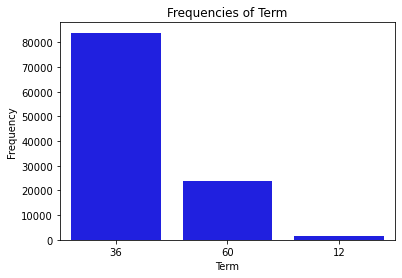

In [21]:
#check which loan is more preferable

features_plot('x', 'Term')

- we could see that borrowers seem to prefer 36 months loan term while 12months is the least preferable.

#### What is the behaviour of borrowers in respect to loan repayment?

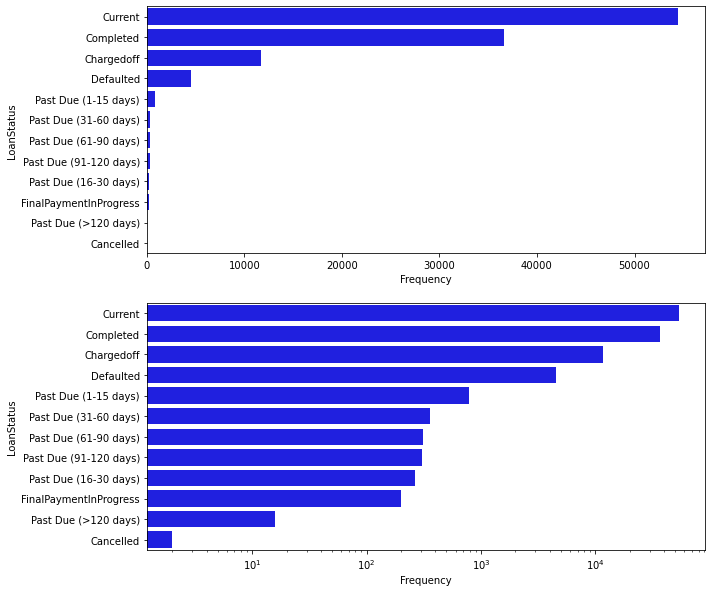

In [22]:
plt.figure(figsize = [10, 10]) 

plt.subplot(2,1,1)
features_plot('y', 'LoanStatus')


plt.subplot(2,1,2)
features_plot('y', 'LoanStatus')
plt.xscale('log')

- A good number of borrowers have completed their payment while many are still paying, but few of them got their loan canceled,
- it is worth noticing that some of these borrowers are due for payments

#### What are the major reasons why people take loan? 

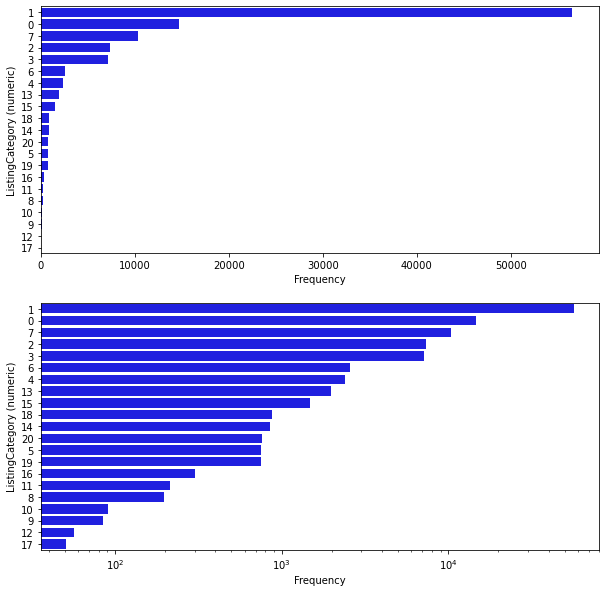

In [23]:
plt.figure(figsize = [10, 10]) 

plt.subplot(2,1,1)
features_plot('y', 'ListingCategory (numeric)')


plt.subplot(2,1,2)
features_plot('y', 'ListingCategory (numeric)')
plt.xscale('log')

The category of the listing that the borrower selected when posting their listing: 
- 0 - Not Available, 
- 1 - Debt Consolidation, 
- 2 - Home Improvement, 
- 3 - Business, 
- 4 - Personal Loan, 
- 5 - Student Use, 
- 6 - Auto, 
- 7- Other, 
- 8 - Baby&Adoption, 
- 9 - Boat, 
- 10 - Cosmetic Procedure, 
- 11 - Engagement Ring, 
- 12 - Green Loans, 
- 13 - Household Expenses, 
- 14 - Large Purchases, 
- 15 - Medical/Dental, 
- 16 - Motorcycle, 
- 17 - RV, 
- 18 - Taxes, 
- 19 - Vacation, 
- 20 - Wedding Loans.

- The above barchart shows that many of the borrowers took loan to service debts and majority prefer not to state their reasons. 

#### Which occupation is most common among the borrowers?

In [24]:
df_loan['Occupation'].nunique()

67

In [25]:
Occupation_few = df_loan['Occupation'].value_counts()[0:20]

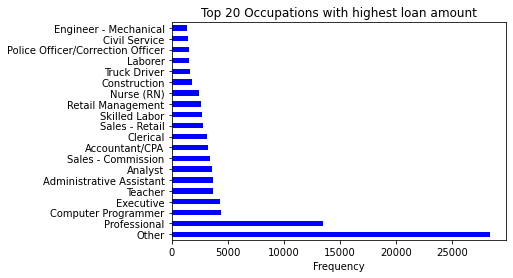

In [26]:
Occupation_few.plot(kind='barh', color='blue')
plt.xlabel('Frequency')
plt.title('Top 20 Occupations with highest loan amount');

- We can deduce from the above plot that some of these borrowers prefer not to indicate their profession and hence hide under 'others' and 'professional'. Known professions with highest number of borrowers are computer programmers, teachers and analysts.

#### Are people taking loan because they are out of jobs?

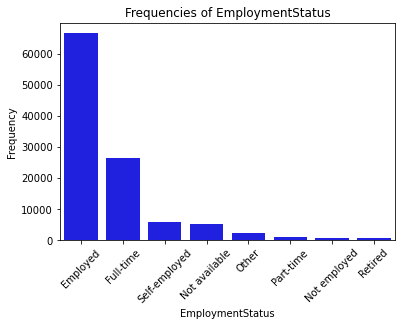

In [27]:
features_plot('x', 'EmploymentStatus')
plt.xticks(rotation=45);

- On the contrary, most of the borrowers are actually employed while the least of them are retiree. 

#### What is the ration of home owners?

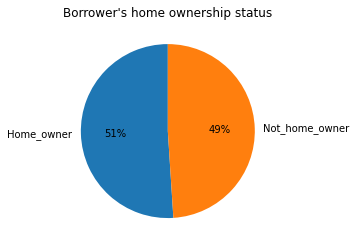

In [28]:
label = ['Home_owner', 'Not_home_owner']
plt.pie(df_loan['IsBorrowerHomeowner'].value_counts(), labels=label, startangle = 90, autopct='%.0f%%')
plt.title("Borrower's home ownership status");

- Fair enough, it's almost a tie

#### Which year experienced huge number of borrowers?

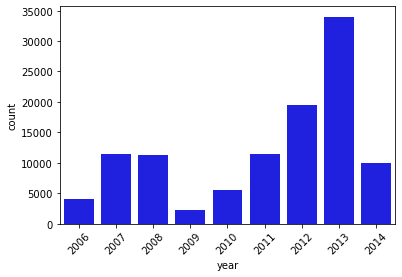

In [29]:
sns.countplot(data=df_loan, x='year', color='blue')
plt.xticks(rotation=45);

- Apparently, most of the loans are obtained in 2013 followed by 2012 while 2009 has the lowest turnout. 

In [30]:
#funtion to plot a labeled histogram

def histogram(feature, Bins):
    '''
    Bins: set the bins of the histogram
    '''
    df_loan[feature].hist(bins = Bins)
    plt.axvline(x = df_loan[feature].mean(), color = 'red')
    name = str()
    plt.title('Distribution of {}'.format(df_loan[[feature]].columns[0]))
    plt.xlabel(df_loan[[feature]].columns[0])
    plt.ylabel('Frequency')

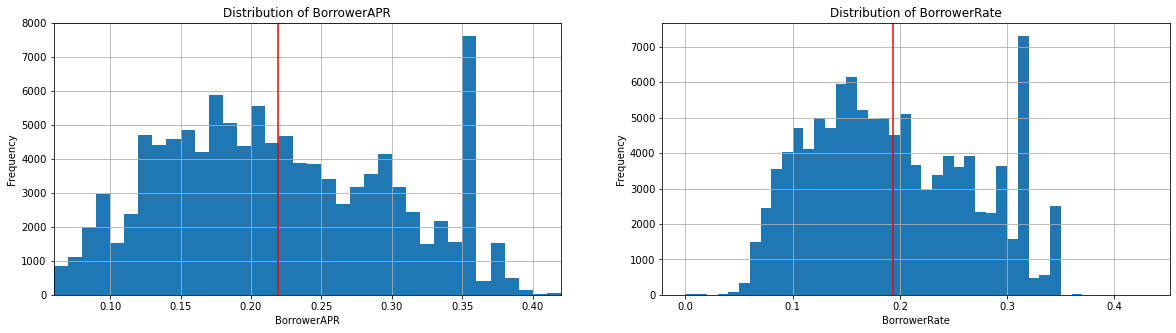

In [31]:
plt.figure(figsize = [20, 5]) 

#distribution of borrower's APR
plt.subplot(1,2,1)
Binsize = np.arange(0, df_loan['BorrowerAPR'].max()+0.01, 0.01)
histogram('BorrowerAPR', Binsize)
plt.xlim(0.06, 0.42);


#distribution of borrower's rate
plt.subplot(1,2,2)
histogram('BorrowerRate', Binsize)

- Both **BorrowerAPR** and **BorrowerRate** are normally distributed,
- most of the borrowers has around 0.22 APR,
- borrower's rate has a mean of around 0.19

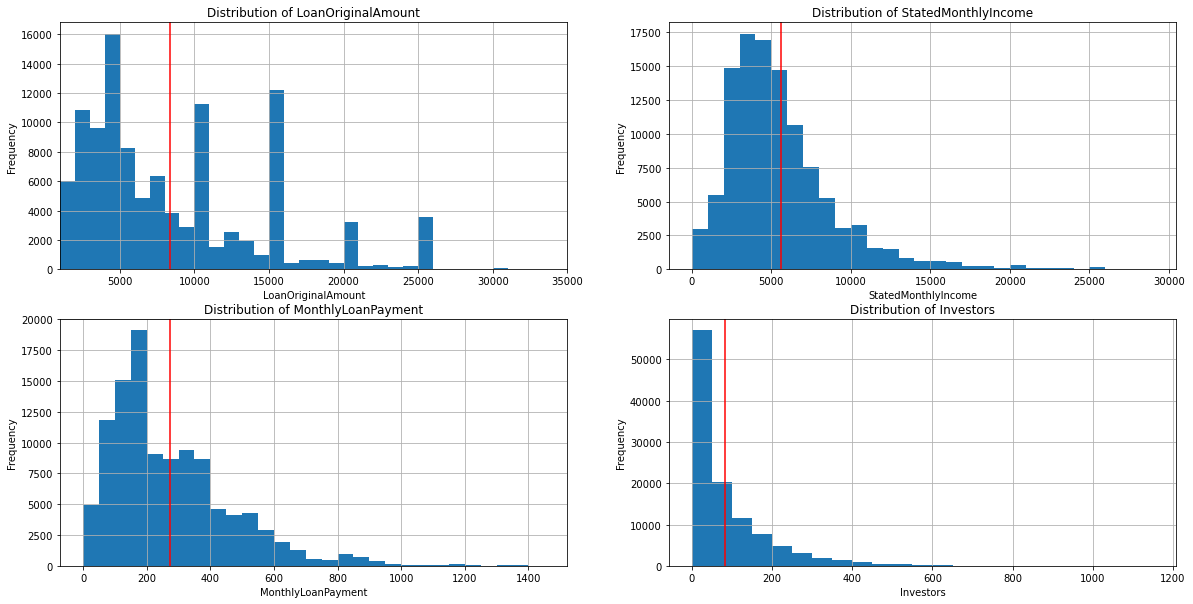

In [32]:
plt.figure(figsize = [20, 10]) 

plt.subplot(2,2,1)
# Visualize the distribution of the Loan original amount
Binsize = np.arange(0,35000, 1000)
histogram('LoanOriginalAmount', Binsize)
plt.xlim(1000, 35000);


plt.subplot(2,2,2)
# Visualize the distribution of the stated monthly income
Binsize = np.arange(0,30000, 1000)
histogram('StatedMonthlyIncome', Binsize)

plt.subplot(2,2,3)
# Check the distribution of monthly loan payment
Binsize = np.arange(0,1500, 50)
histogram('MonthlyLoanPayment', Binsize)

plt.subplot(2,2,4)
Binsize = np.arange(0,df_loan['Investors'].max(), 50)
histogram('Investors', Binsize)

- **LoanOriginalAmount**, **StatedMonthlyIncome** and **MonthlyLoanPayment** are right skewed.
- Majority of the borrowers collected less than 5000 and the overall data has a mean of 8500 in value,
- most of them receive a salary less than 5000 with overall mean of 5500 and repay around 275 every month
- most of the loans taken has a joint contribution of less than 50 people. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **LoanOriginalAmount, StatedMonthlyIncome** and **MonthlyLoanPayment** were right skewed, while both **BorrowerAPR, BorrowerRate** and **Investors** were normally distributed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions in the features investigated. However, I took log transformation of axis for **LoanStatus** and **ListingCategory** because it was not easy to see behaviour of these features. 

## Bivariate Exploration


#### What is the relationship between borrower's rate, loan original amount, stated monthly income, investors and year?

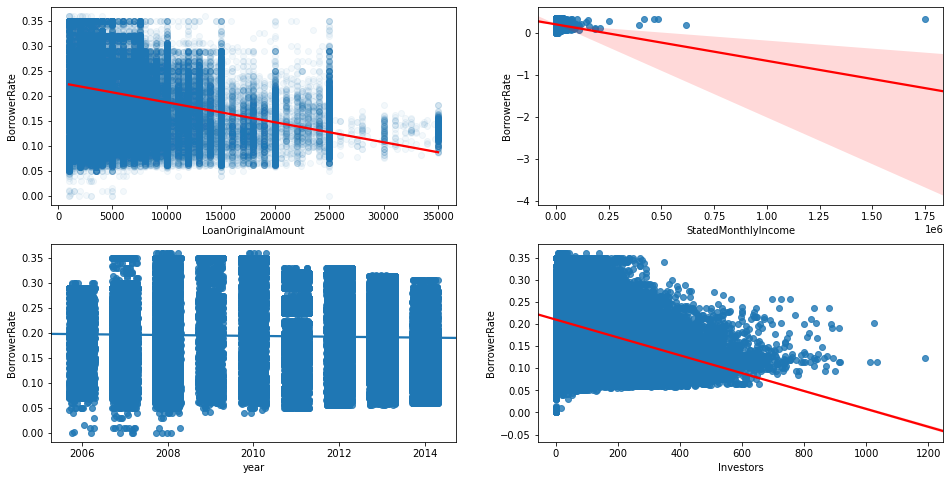

In [33]:
plt.figure(figsize = [16,8])  


plt.subplot(2,2,1)
sns.regplot(data = df_loan, y = 'BorrowerRate', x='LoanOriginalAmount',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.subplot(2,2,2)
sns.regplot(data = df_loan, y = 'BorrowerRate', x='StatedMonthlyIncome', truncate=False,
             line_kws={'color': 'red'})
#plt.xscale('log')

plt.subplot(2,2,3)
sns.regplot(data = df_loan, x = 'year', y = 'BorrowerRate', truncate=False, x_jitter=0.3)

plt.subplot(2,2,4)
sns.regplot(data = df_loan, x = 'Investors', y = 'BorrowerRate', truncate=False,
           line_kws={'color': 'red'});


- borrower's rate seems to have negative correlation with all these variables.

#### Relationship between BorrowerRate, Loan and Emplyment status

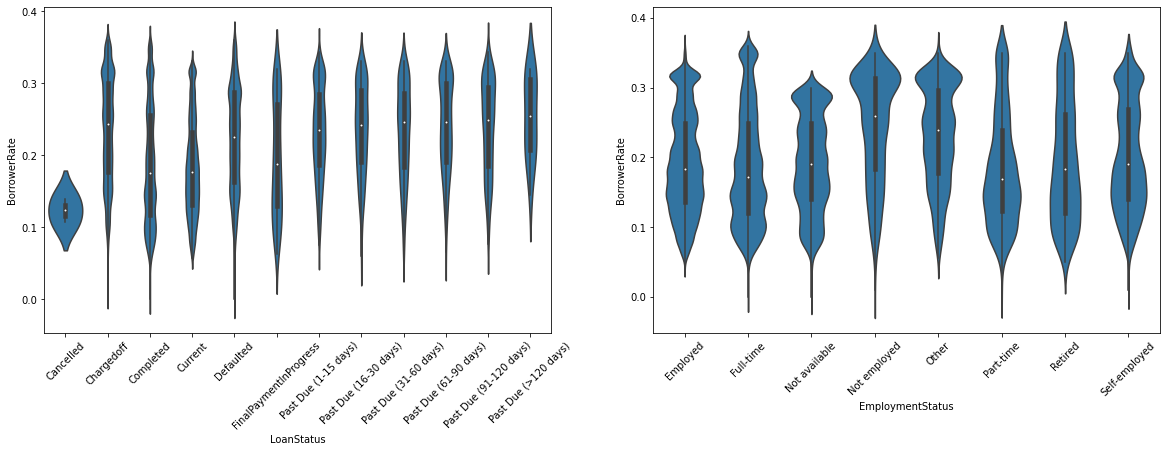

In [34]:
plt.figure(figsize = [20, 6])

plt.subplot(1,2,1)
sns.violinplot(data=df_loan, x='LoanStatus', y='BorrowerRate', color= sns.color_palette()[0])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.violinplot(data=df_loan, x='EmploymentStatus', y='BorrowerRate', color= sns.color_palette()[0])
plt.xticks(rotation=45);


#### Are there any realtionship(s) between LoanStatus, Term, EmploymentStatus and IsBorrowerHomeOwner?

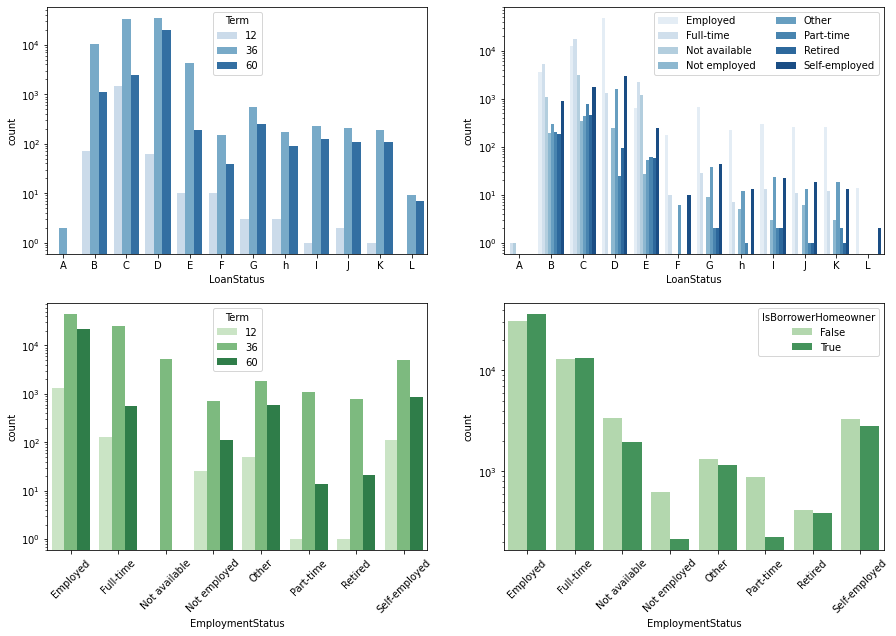

In [35]:
plt.figure(figsize = [15, 10])
rep = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'h', 'I', 'J', 'K', 'L']

#subplot 1: LoanStatus VS Term
ax = plt.subplot(2, 2, 1)
sns.countplot(data = df_loan, x = 'LoanStatus', hue = 'Term', palette = 'Blues')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = rep[i]
ax.set_xticklabels(labels)
plt.yscale('log')

#subplot 2: LoanStatus VS EmplymentStatus
ax = plt.subplot(2, 2, 2)
sns.countplot(data = df_loan, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = rep[i]
ax.set_xticklabels(labels)
plt.yscale('log')
ax.legend(loc=1, ncol = 2)

#subplot 3: EmploymentStatus VS Term
plt.subplot(2, 2, 3)
sns.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
plt.xticks(rotation=45)
plt.yscale('log');

#subplot 4: Employment Status VS IsBorrowerHomeOwner
plt.subplot(2, 2, 4)
sns.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Greens')
plt.xticks(rotation=45)
plt.yscale('log');
plt.show()

- 36 months loan Term seems to common to all employment status and loan status,
- larger percentage of the loan takers are employed,
- not employed and part-time workers are mostly the ones without home.

A = Cancelled, B = Chargedoff, C = Completed, D = Current, E = Defaulted, F = FinalPaymentInProgress,
G = Past Due (1-15 days),  <br> H = Past Due (16-30 days), I = Past Due (31-60 days),  J = Past Due (61-90 days), K = Past Due (91-120 days), L = Past Due (>120 days)

#### Which profession is known to taking loan the most/least? 

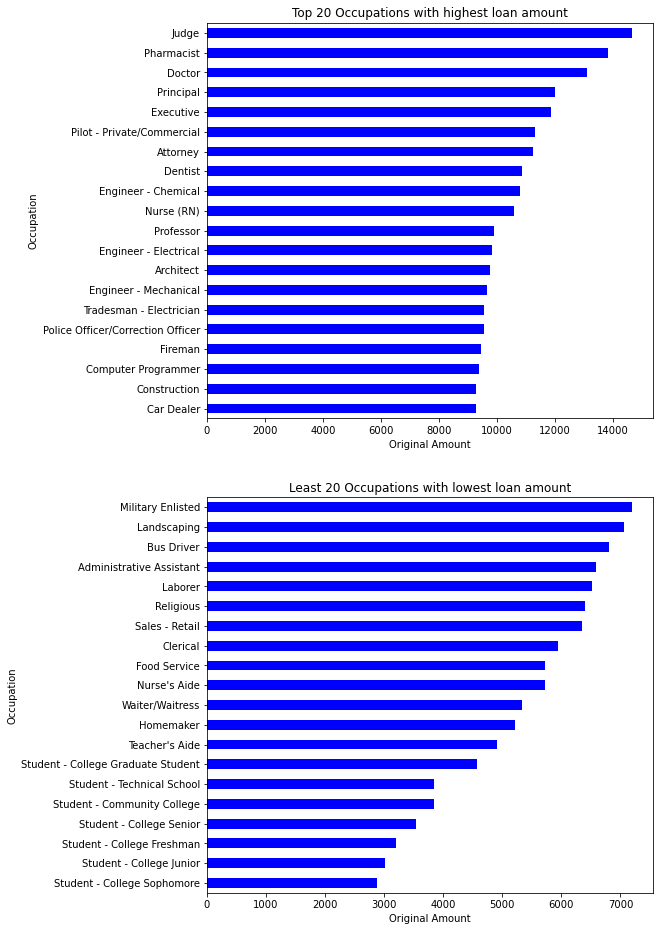

In [36]:
plt.figure(figsize = [8, 16])  

plt.subplot(2,1,1)
top_occupation = df_loan.groupby('Occupation').LoanOriginalAmount.mean().sort_values()[-20:]
top_occupation.plot(kind = "barh", color = 'blue')
plt.xlabel('Original Amount')
plt.title('Top 20 Occupations with highest loan amount')

plt.subplot(2,1,2)
least_occupation = df_loan.groupby('Occupation').LoanOriginalAmount.mean().sort_values()[:20]
least_occupation.plot(kind = "barh", color = 'blue')
plt.xlabel('Original Amount')
plt.title('Least 20 Occupations with lowest loan amount');

- Judges, pharmacist and Doctor are leading the chart of highest loan takers while students take the least loan. 

#### Is there correlation between amount of loan and payment terms?

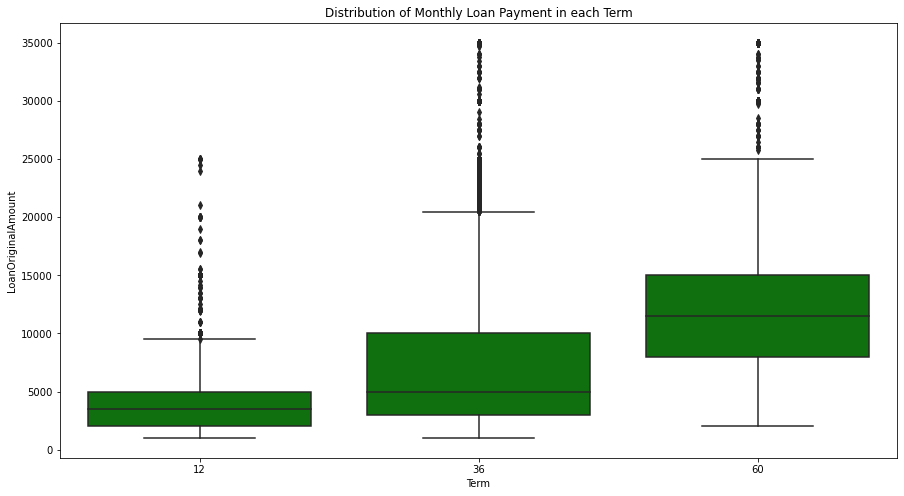

In [37]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df_loan, x='Term', y='LoanOriginalAmount', color='green')
plt.title('Distribution of Monthly Loan Payment in each Term');

- there's a positive correlation between amount of loan and payment term.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower's rate has negative correlation with loan original amount, stated monthly income, investors and year.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 
- 36 months loan Term seems to common to all employment status and loan status,
- larger percentage of the loan takers are employed,
- not employed and part-time workers are mostly the ones without home,
- there's a positive correlation between amount of loan and payment term,
- Judges, pharmacist and Doctor are leading the chart of highest loan takers while students take the least loan.

## Multivariate Exploration


#### What are the relationship between all numerical variables in the datasets?

In [38]:
numeric_cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeLower',
               'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount',
               'MonthlyLoanPayment', 'Investors']
cat_cols = ['LoanStatus', 'ListingCategory (numeric)', 'IsBorrowerHomeowner', 
            'EmploymentStatus', 'year', 'month']

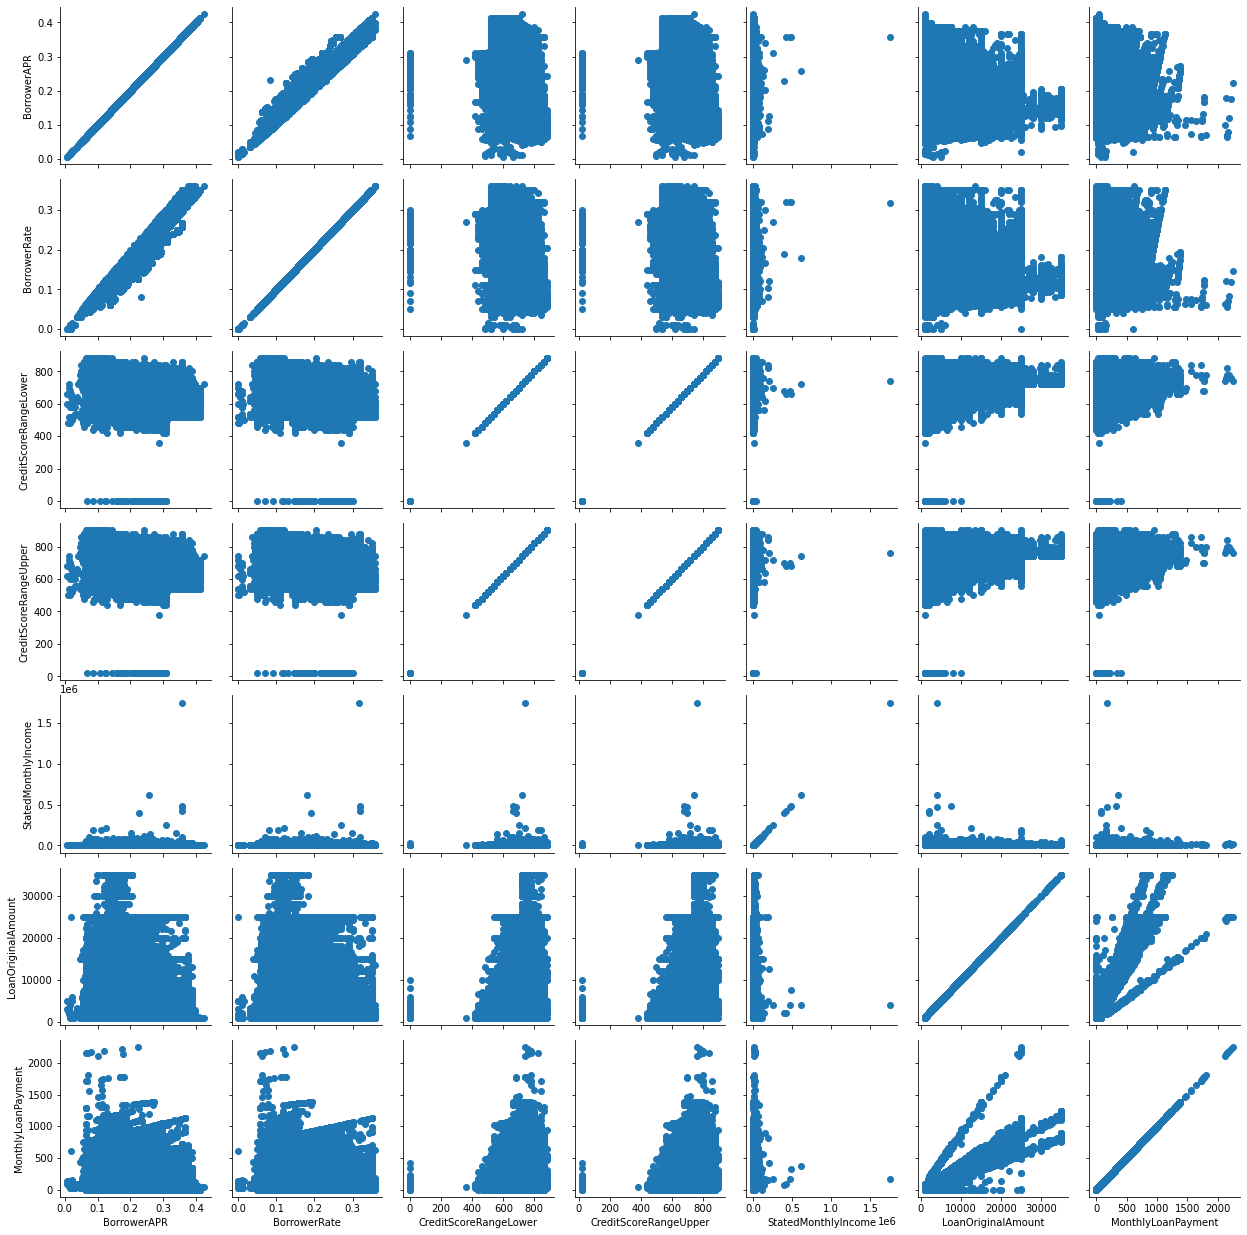

In [39]:
#check relationships between multiple variables
cols = ['BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeLower', 
        'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount',
        'MonthlyLoanPayment']
g = sns.PairGrid(data=df_loan, vars=cols);
g.map(plt.scatter);

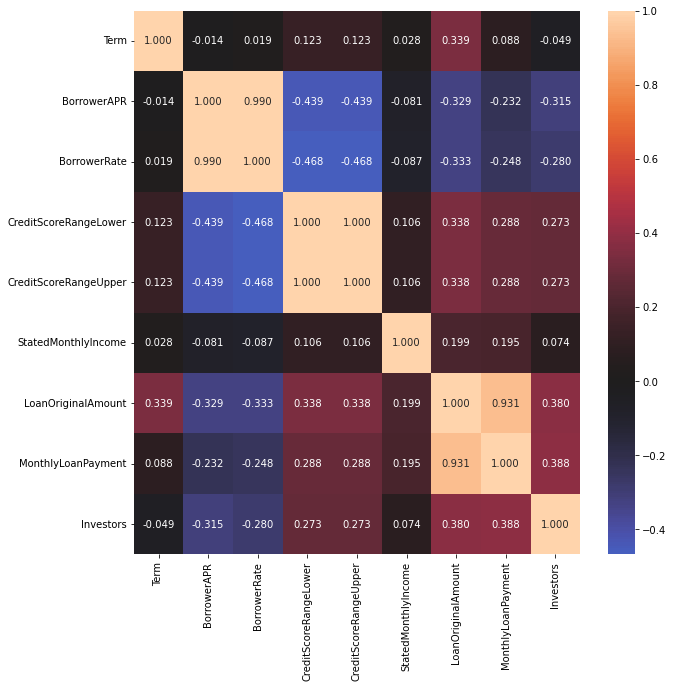

In [40]:
# correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(df_loan[numeric_cols].corr(), annot = True, fmt = '.3f', center = 0)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There are no strong relationships between most of the variables. LoanOriginalAmount and MonthlyLoanPayment has a strong correlation between them. Also, BorrowerAPR and BorrowerRate has strong correlation. 

### Were there any interesting or surprising interactions between features?

> It was actually surprising to see that BorrowerRate has a negative correlation with LoanOriginalAmount and weak correlation with Loan Term. 

## Conclusions
> Having exploited some variables in the dataset, the only variable that has a strong impact on BorrowerRate is BorrowerAPR, while others have little or negative correlation. It was noted that, many borrowers are on 36 months payment period and as at the time the data was gathered, many of them are still paying while few of them had their loan request cancelled. The common reason for taking loan among borrowers is to service debt and 2013 witnessed the highest turnout. The average amount borrowed was around 8200 at the rate of 0.19 and monthly payment of around 275. 


